<a href="https://colab.research.google.com/github/Sergius-DS/Customer_Segmentation/blob/main/Customer_segmentation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 999)

import warnings
warnings.filterwarnings('ignore')

## EXPLORATORY DATA ANALYSIS

In [3]:
df = pd.read_csv('online_retail_II.csv')

In [4]:
df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [6]:
df.describe()

,Quantity,Price,Customer ID
count,525461.00,525461.00,417534.00
mean,10.34,4.69,15360.65
std,107.42,146.13,1680.81
min,-9600.00,-53594.36,12346.00
25%,1.00,1.25,13983.00
50%,3.00,2.10,15311.00
75%,10.00,4.21,16799.00
max,19152.00,25111.09,18287.00


**OBSERVATIONS:**

Quantity and Price, show negative values.

In [7]:
df.describe(include='object')

,Invoice,StockCode,Description,InvoiceDate,Country
count,525461,525461,522533,525461,525461
unique,28816,4632,4681,25296,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,675,3516,3549,675,485852


In [8]:
df[df['Customer ID'].isna()].head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom


In [9]:
df[df['Quantity'] < 0].head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [10]:
df['Invoice'] = df['Invoice'].astype('str')

In [11]:
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


TO CHECK IF THERE ARE MORE CHARACTERS APART FROM "C" CANCELATION

In [12]:
df['Invoice'].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
df[df['Invoice'].str.contains('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


**OBSERVATIONS:**

In the description says "Adjust bad debt" and negative Price

CHECKING WHAT DOES NOT CONTAIN ONLY DIGITS IN STOCKCODE

In [14]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

**OBSERVATIONS:**

They seem legit transactions

In [15]:
df[df['StockCode'].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


**OBSERVATIONS:**

736 NaN in CustomerID, apparently Postage fees

In [16]:
df[df['StockCode'].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


**OBSERVATIONS:**

There is no missing data, category will be kept

## DATA CLEANING

In [17]:
cleaned_df = df.copy()

In [18]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

In [19]:
cleaned_df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom


In [20]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True) |
    (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

In [21]:
cleaned_df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom


In [22]:
cleaned_df = cleaned_df.dropna(subset=['Customer ID'])

In [23]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,406337.00,406337.00,406337.00
mean,13.62,2.99,15373.63
std,97.00,4.29,1677.37
min,1.00,0.00,12346.00
25%,2.00,1.25,14004.00
50%,5.00,1.95,15326.00
75%,12.00,3.75,16814.00
max,19152.00,295.00,18287.00


**OBSERVATIONS:**

Negative values were present in Quantity. After dropping NaN in Customer ID, it looks fine

In [24]:
cleaned_df[cleaned_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [25]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [26]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,406309.00,406309.00,406309.00
mean,13.62,2.99,15373.72
std,97.00,4.29,1677.33
min,1.00,0.00,12346.00
25%,2.00,1.25,14006.00
50%,5.00,1.95,15326.00
75%,12.00,3.75,16814.00
max,19152.00,295.00,18287.00


In [27]:
cleaned_df['Price'].min()

0.001

**OBSERVATIONS:**

Values with 0.0 for Price were removed, this is fine now

HOW MUCH DATA WAS DROPPED WHEN CLEANING

In [28]:
print(f"Percantage of data kept after cleaning: {round(len(cleaned_df) / len(df) * 100, 2)}%")
print(f"Percentage of Data dropped: {round(100 - 77.32, 2)}%")

Percantage of data kept after cleaning: 77.32%
Percentage of Data dropped: 22.68%


In [29]:
cleaned_df['SalesTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00


In [30]:
aggregated_df = cleaned_df.groupby('Customer ID', as_index=False).agg(
    MonetaryValue = ('SalesTotal', 'sum'),
    Frequency = ('Invoice', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)

In [31]:
aggregated_df.head(2)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00


In [32]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

In [33]:
type(max_invoice_date)

str

In [34]:
aggregated_df['LastInvoiceDate'].dtype

dtype('O')

In [35]:
aggregated_df['LastInvoiceDate'] = pd.to_datetime(aggregated_df['LastInvoiceDate'])

In [36]:
max_invoice_date = pd.to_datetime(max_invoice_date)

In [37]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [38]:
aggregated_df.head(2)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2


CHECKING DISTRIBUTIONS FOR MONETARYVALUE, FREQUENCY	AND	RECENCY

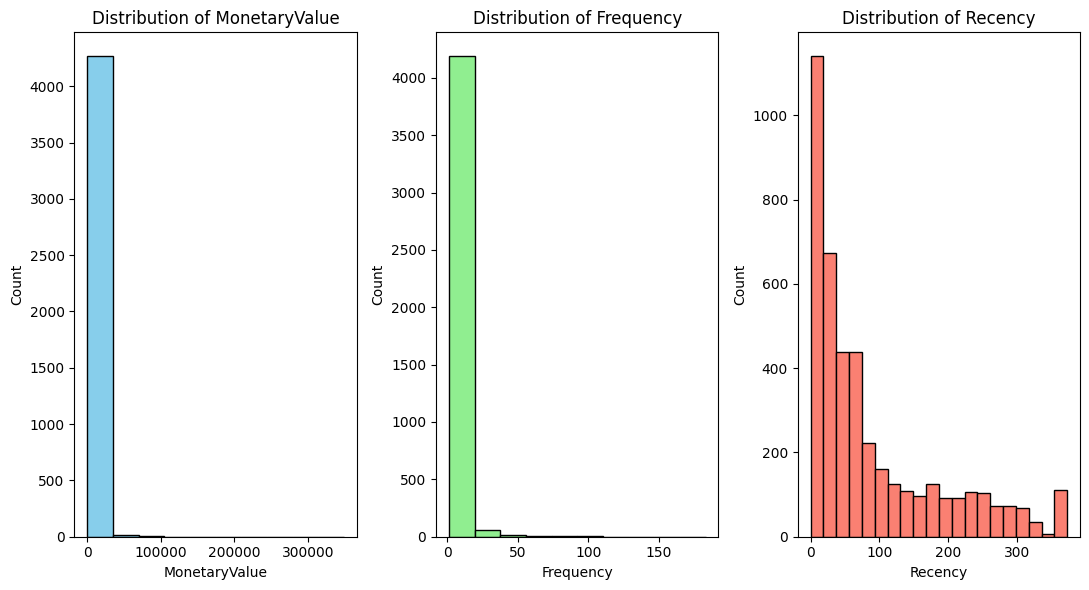

In [39]:
plt.figure(figsize=(11, 6))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of MonetaryValue')
plt.xlabel('MonetaryValue')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

BOX PLOTS MONETARYVALUE, FREQUENCY, AND RECENCY

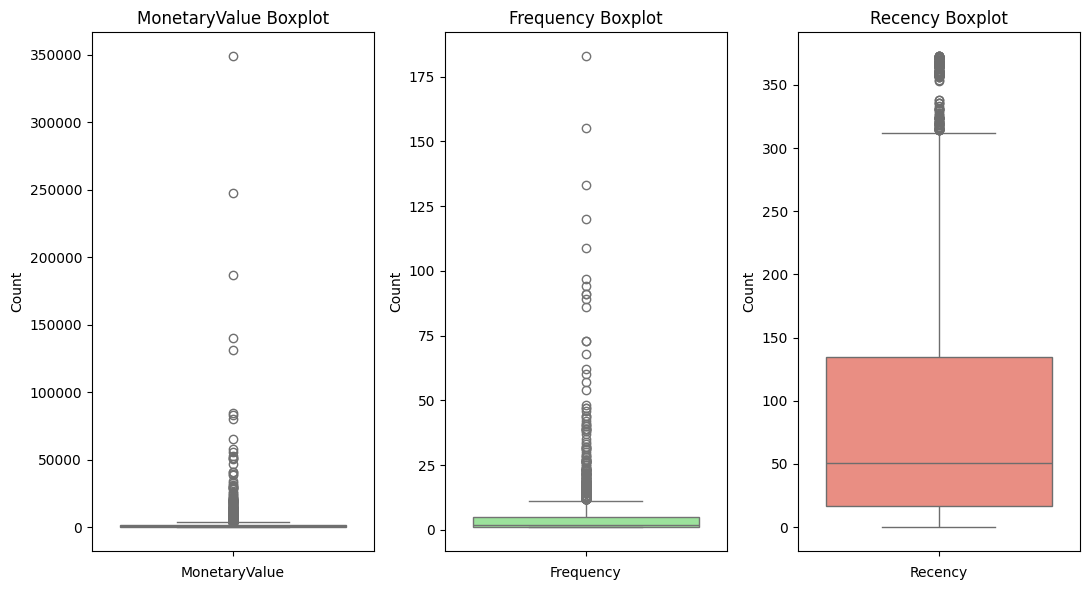

In [40]:
plt.figure(figsize=(11, 6))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df['MonetaryValue'], color='skyblue')
plt.title('MonetaryValue Boxplot')
plt.xlabel('MonetaryValue')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [41]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

In [42]:
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | \
                                     (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()

In [43]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [44]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

In [45]:
frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | \
                                      (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

In [46]:
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


NON OUTLIERS DATAFRAME

In [47]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index) & (~aggregated_df.index.isin(frequency_outliers_df.index)))]

In [48]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


NON OUTLIERS BOXPLOTS

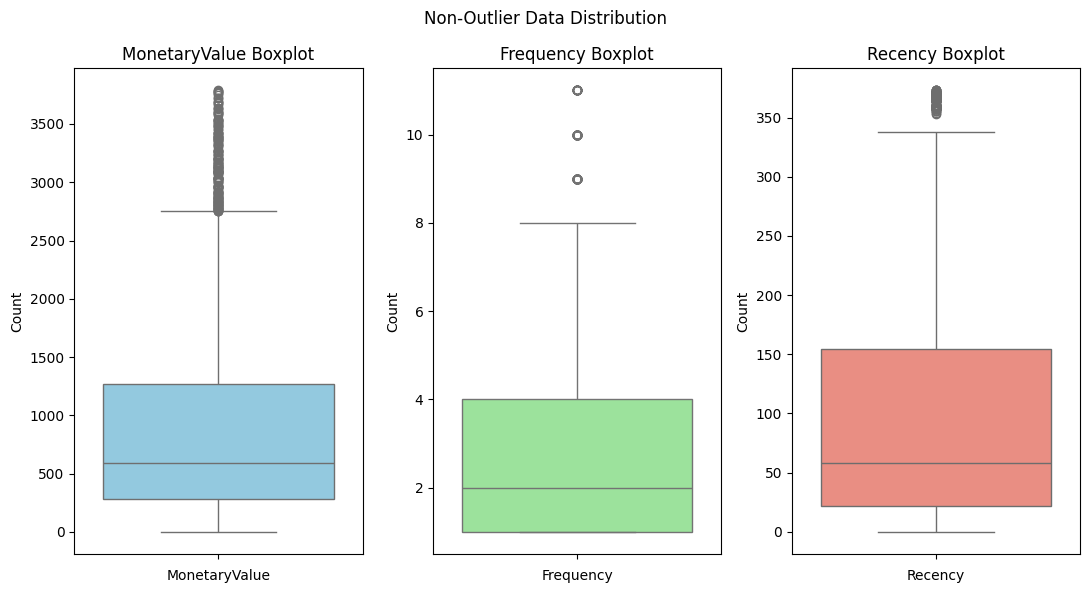

In [49]:
plt.figure(figsize=(11, 6))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('MonetaryValue Boxplot')
plt.xlabel('MonetaryValue')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.suptitle('Non-Outlier Data Distribution')

plt.tight_layout()
plt.show()

## APPLYING STANDARD SCALER

In [50]:
scaler = StandardScaler()

In [51]:
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

In [52]:
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [53]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])

In [54]:
scaled_data_df.head(2)

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97


## KMEANS CLUSTERING

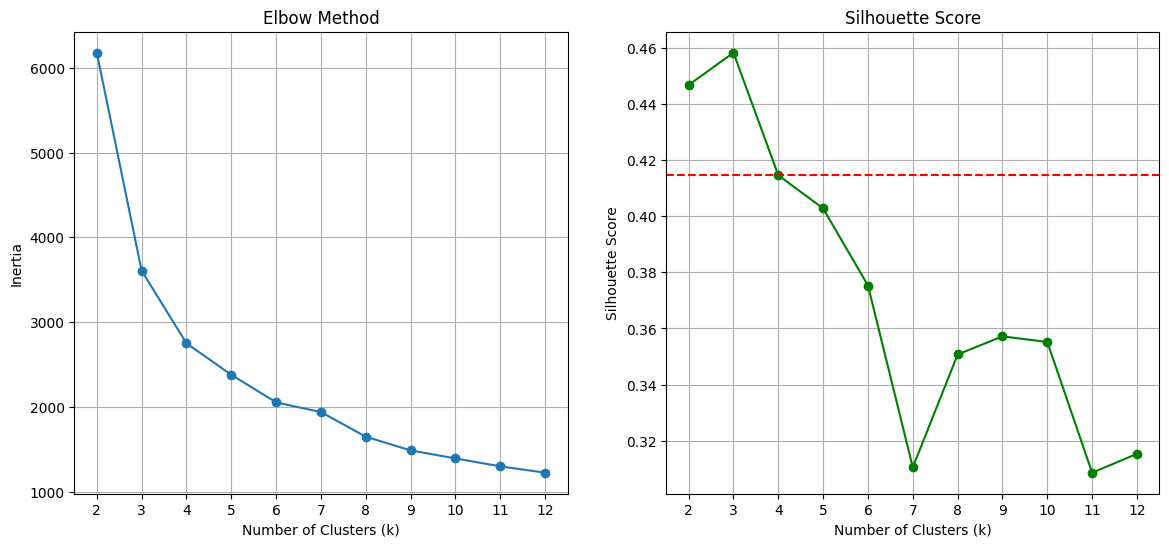

In [55]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

  kmeans = KMeans(n_clusters=k, random_state=88, max_iter=1000)

  cluster_labels = kmeans.fit_predict(scaled_data_df)

  sil_score = silhouette_score(scaled_data_df, cluster_labels)

  silhouette_scores.append(sil_score)

  inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.xticks(k_values)
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
# Identify cluster Number 4
k_index = k_values.index(4)
silhouette_score_k4 = silhouette_scores[k_index]

# Add a horizontal line at the silhouette score for k=4
plt.axhline(y=silhouette_score_k4, color='r', linestyle='--', label=f'k=4 score: {silhouette_score_k4:.2f}')

plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.xticks(k_values)
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**OBSERVATIONS:**

Following Elbow method, the conclusion was between 4 to 5 clusters, taking into account Silhouette Score, 4 clusters gives an optimal score (less potential overlap among clusters)

APPLYING KMEANS ON DEFINED CLUSTERS

In [56]:
kmeans = KMeans(n_clusters=4, random_state=88, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)

In [57]:
print(pd.Series(cluster_labels).value_counts())

0    1485
3     916
2     901
1     507
Name: count, dtype: int64


In [58]:
non_outliers_df['Cluster'] = cluster_labels

In [59]:
non_outliers_df.head(4)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,3


## VISUALIZING CLUSTERS 3D

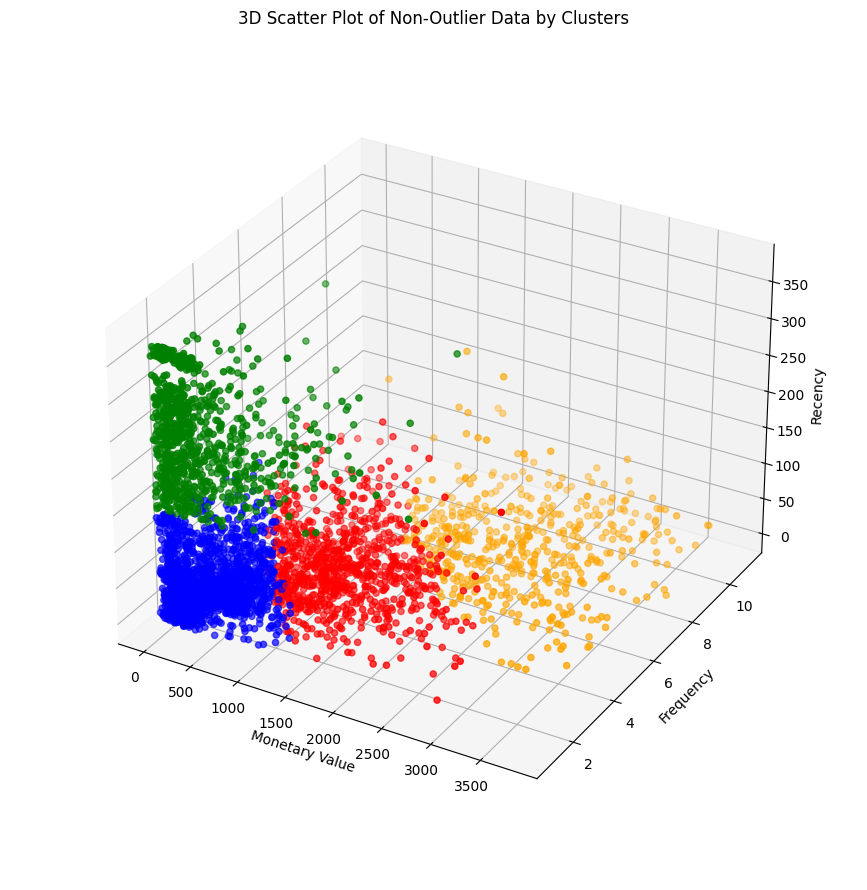

In [60]:
cluster_colors = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

# Increase figure size (adjust width and height as needed)
fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(projection='3d')

# Adjust zoom value for better balance
ax.set_box_aspect(None, zoom=0.88)

scatter = ax.scatter(
    non_outliers_df['MonetaryValue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'],
    c= colors,
    marker='o'
)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.title('3D Scatter Plot of Non-Outlier Data by Clusters')
plt.tight_layout()
plt.show()

## VIOLIN PLOTS

RELATIVE IMPORTANCE VALUES

In [61]:
non_outliers_df.groupby(['Cluster']).agg({
    'MonetaryValue': ['mean', 'count'],
    'Frequency': 'mean',
    'Recency': 'mean'
}).round(0)

MonetaryValue                  Frequency              Recency
                        mean count                 mean                 mean
Cluster                                                                     
0                     413.00  1485                 2.00                54.00
1                    2416.00   507                 7.00                34.00
2                     385.00   901                 1.00               251.00
3                    1297.00   916                 4.00                50.00

In [62]:
cluster_avg = non_outliers_df.groupby(['Cluster']).mean()

In [63]:
cluster_avg

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
Cluster,,,,,
0,15369.07,412.94,1.63,2010-10-16 13:14:32.727272704,54.00
1,15296.69,2416.27,7.21,2010-11-05 06:56:09.349112576,34.27
2,15457.89,384.78,1.43,2010-04-02 06:26:12.053274112,251.28
3,15352.59,1296.85,3.86,2010-10-20 12:48:08.580785920,50.02


In [64]:
population_avg = non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']].mean()

In [65]:
population_avg

,0
MonetaryValue,885.50
Frequency,2.86
Recency,97.08


In [66]:
# Calculate relative importance for each cluster
relative_imp = cluster_avg[['MonetaryValue', 'Frequency', 'Recency']].div(population_avg) - 1
# Display the relative importance
print(relative_imp)

               MonetaryValue            Frequency              Recency
Cluster                                                               
0                      -0.53                -0.43                -0.44
1                       1.73                 1.52                -0.65
2                      -0.57                -0.50                 1.59
3                       0.46                 0.35                -0.48


VIOLIN PLOTS TO EXAMINE CLUSTERS'S IMPORTANCE

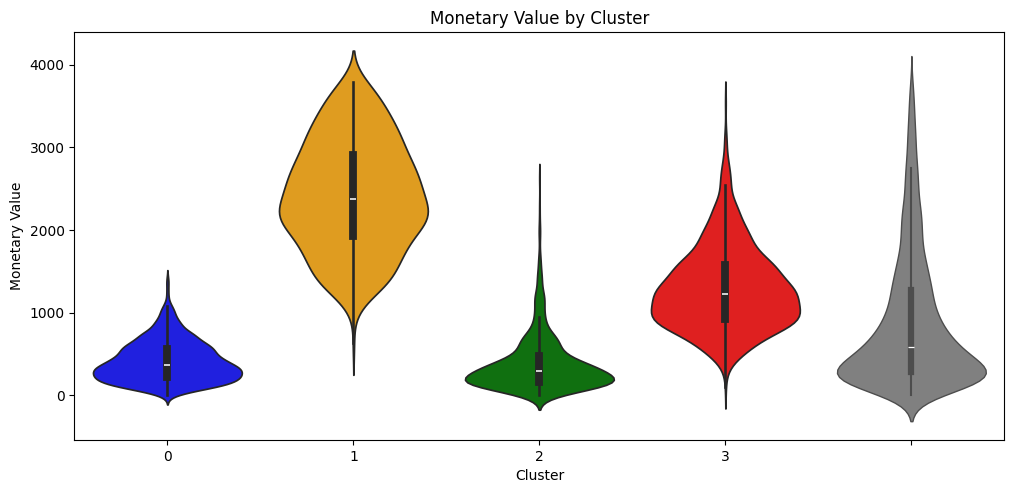


----------------------------------------



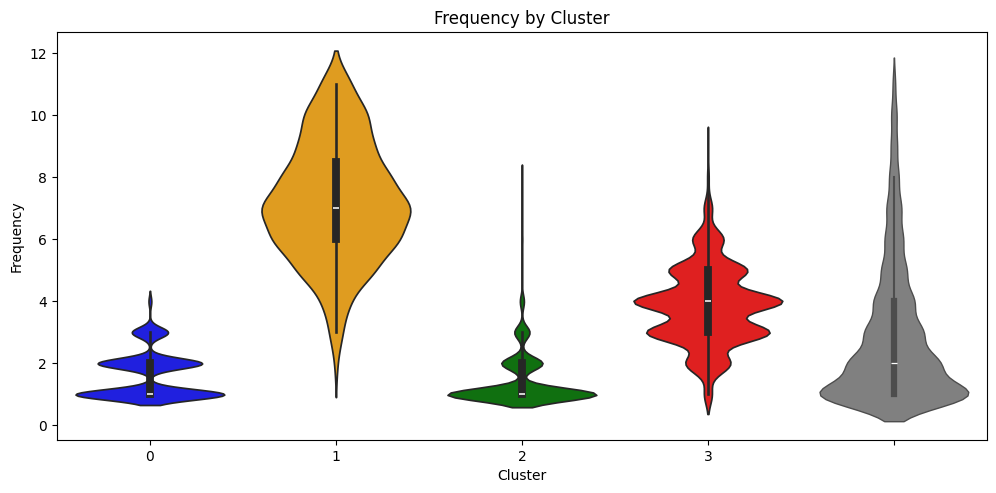


----------------------------------------



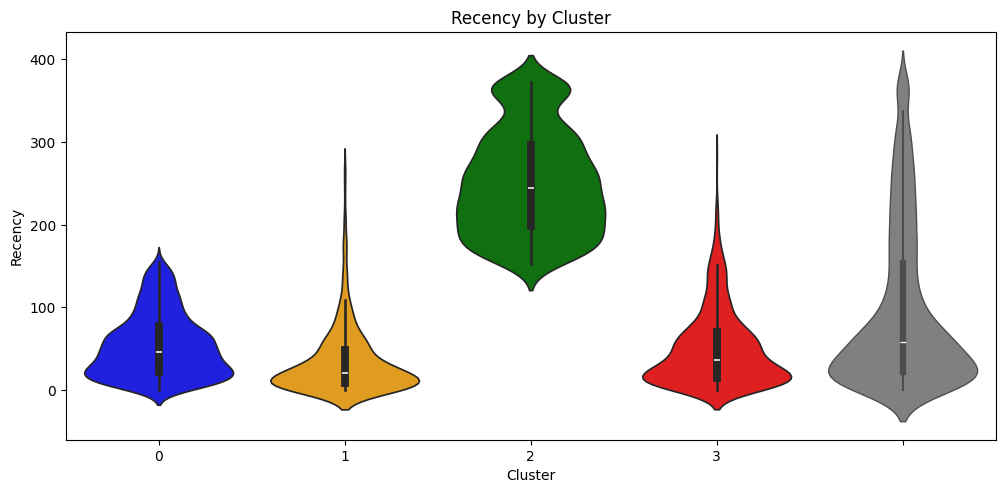


----------------------------------------



<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(12, 18))

cluster_colors = {
    '0': 'blue',
    '1': 'orange',
    '2': 'green',
    '3': 'red'
}

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')
plt.show()
# Agrega una gran Línea con 40 Caracteres y un salto de línea al comienzo y fin
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')
plt.show()
# Agrega una gran Línea con 40 Caracteres y un salto de línea al comienzo y fin
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')
plt.show()
# Agrega una gran Línea con 40 Caracteres y un salto de línea al comienzo y fin
print("\n" + "-"*40 + "\n")
plt.tight_layout()



## PLOT: RELATIVE IMPORTANCE OF ATTRIBUTES

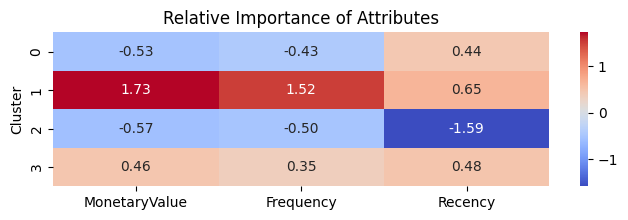

In [68]:
# Calculate relative importance for each cluster, negate Recency values
relative_imp = cluster_avg[['MonetaryValue', 'Frequency', 'Recency']].div(population_avg) - 1
relative_imp['Recency'] *= -1  # Negate Recency values

plt.figure(figsize=(8,2))
plt.title("Relative Importance of Attributes")
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## GIVING NAMES TO CLUSTERS

CLUSTER 0 (BLUE): "Nurture"

CLUSTER 1 (ORANGE): "Reward"

CLUSTER 2 (GREEN): "Re-Engage"

CLUSTER 3 (RED): "Retain"

Cluster 0 (BLUE): "Nurture"  

Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

Cluster 1 (ORANGE): "Reward"  

Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

Cluster 3 (RED): "Retain"

Rationale: This cluster represents medium-value spend customers who purchase regularly, have made purchases relatively recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

Cluster 2 (GREEN): "Re-Engage"  

Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.



## TREATING OUTLIER CLUSTERS

In [69]:
monetary_outliers_df
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.00,6834.99,20,2010-11-09 14:46:00,30
84,12471.00,17721.45,44,2010-11-30 14:35:00,9
85,12472.00,10426.48,13,2010-12-05 14:19:00,4
92,12482.00,21941.72,27,2010-05-12 16:51:00,211
115,12523.00,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14


In [70]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

In [71]:
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [72]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)

In [73]:
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)

In [74]:
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

MANUALLY ASIGN CLUSTER LABELS TO OUTLIER CLUSTERS

In [75]:
monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

**OBSERVATIONS:**

These outliers were labeled manually because to use KMeans properly you have to leave aside outliers

In [76]:
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

In [77]:
print(outlier_clusters_df)

              Customer ID        MonetaryValue  Frequency     LastInvoiceDate  \
9                12357.00             11229.99          1 2010-11-16 10:05:00   
25               12380.00              4782.84          4 2010-08-31 14:54:00   
42               12409.00             12346.62          4 2010-10-15 10:24:00   
48               12415.00             19468.84          4 2010-11-29 15:07:00   
61               12431.00              4145.52         11 2010-12-01 10:03:00   
...                   ...                  ...        ...                 ...   
4235             18223.00              7516.31         12 2010-11-17 12:20:00   
4236             18225.00              7545.14         15 2010-12-09 15:46:00   
4237             18226.00              6650.83         15 2010-11-26 15:51:00   
4241             18231.00              4791.80         23 2010-10-29 14:17:00   
4262             18260.00              7318.91         17 2010-11-30 12:25:00   

      Recency  Cluster  
9 

## VIOLIN PLOTS OUTLIERS

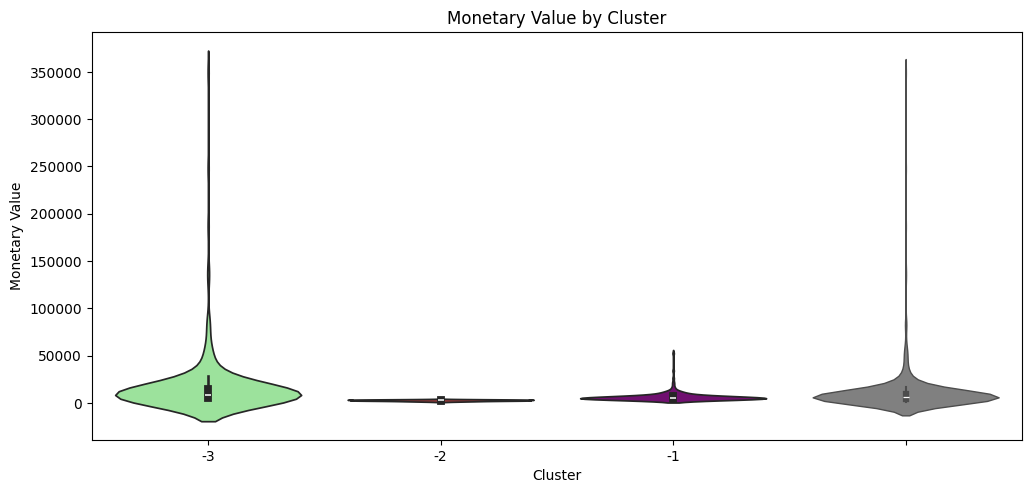


----------------------------------------



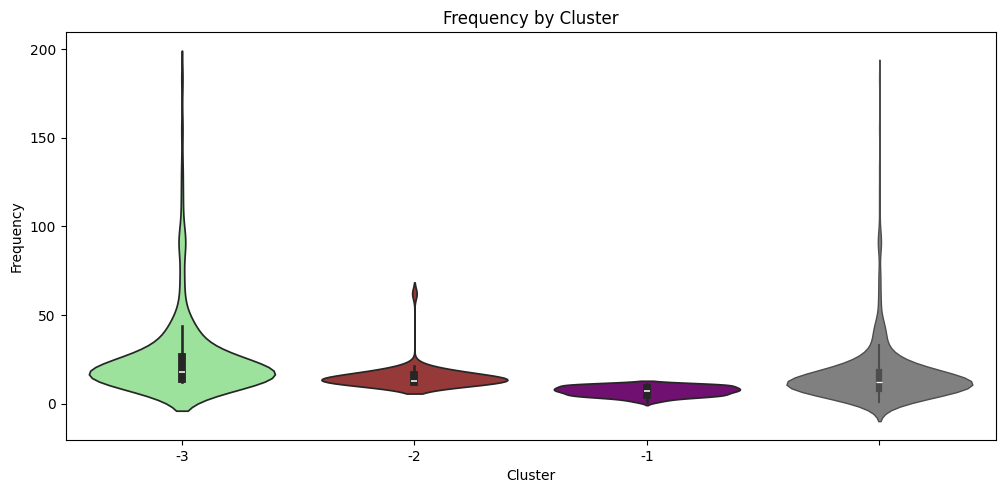


----------------------------------------



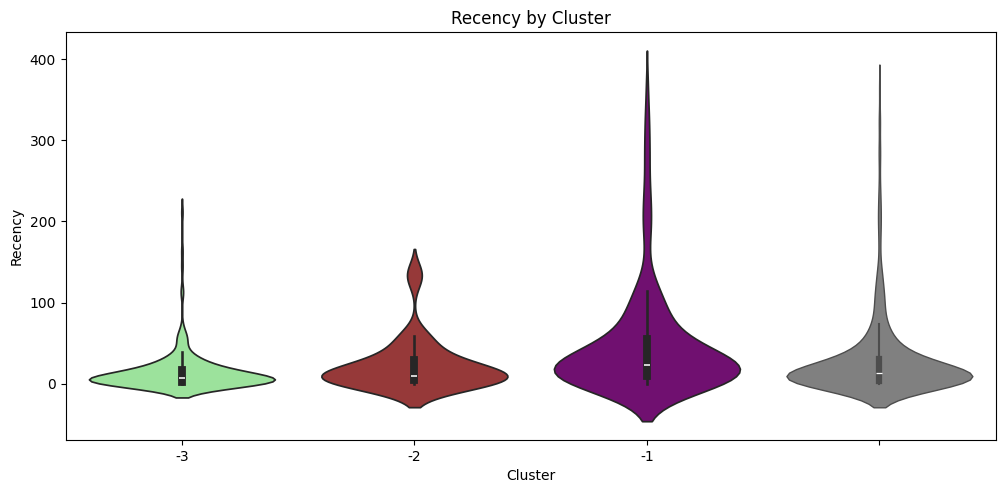


----------------------------------------



<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(12, 18))

cluster_colors = {
    '-1': 'purple',
    '-2': 'brown',
    '-3': 'lightgreen'
}

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors)
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')
plt.show()
# Agrega una gran Línea con 40 Caracteres y un salto de línea al comienzo y fin
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors)
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')
plt.show()
# Agrega una gran Línea con 40 Caracteres y un salto de línea al comienzo y fin
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors)
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')
plt.show()
# Agrega una gran Línea con 40 Caracteres y un salto de línea al comienzo y fin
print("\n" + "-"*40 + "\n")
plt.tight_layout()




Cluster -1 (PURPLE): "PAMPER"  

Rationale: High spenders who have bought recently, but not very frequently
Action: Focus on maintaining their loyalty, custom offers

Cluster -2 (BROWN): "UPSELL"  

Rationale: Customers who spend less, but frequently and recently
Action: Encourage them to have higher spendings per visit

Cluster -3 (LIGHT-GREEN): "DELIGHT"  

Rationale: Customers with very high spending, frequently and recently
Action: Create VIP programms with special offers and benefits for them

In [79]:
cluster_labels = {
    0: 'Nurture',
    1: 'Reward',
    2: 'Re-Engage',
    3: 'Retain',
    -1: 'PAMPER',
    -2: 'UPSELL',
    -3: 'DELIGHT'
}

In [80]:
full_clusters_df = pd.concat([non_outliers_df, outlier_clusters_df])

In [81]:
full_clusters_df['Cluster'].value_counts()

,count
Cluster,
0,1485
3,916
2,901
1,507
-3,226
-1,197
-2,53


In [82]:
full_clusters_df['ClusterLabel'] = full_clusters_df['Cluster'].map(cluster_labels)

In [83]:
full_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,2,Re-Engage
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,3,Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0,Nurture
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,3,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0,Nurture
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


In [84]:
full_clusters_df['ClusterLabel'].value_counts()

,count
ClusterLabel,
Nurture,1485
Retain,916
Re-Engage,901
Reward,507
DELIGHT,226
PAMPER,197
UPSELL,53


## VISUALIZATION OF CLUSTER DISTRIBUTIONS

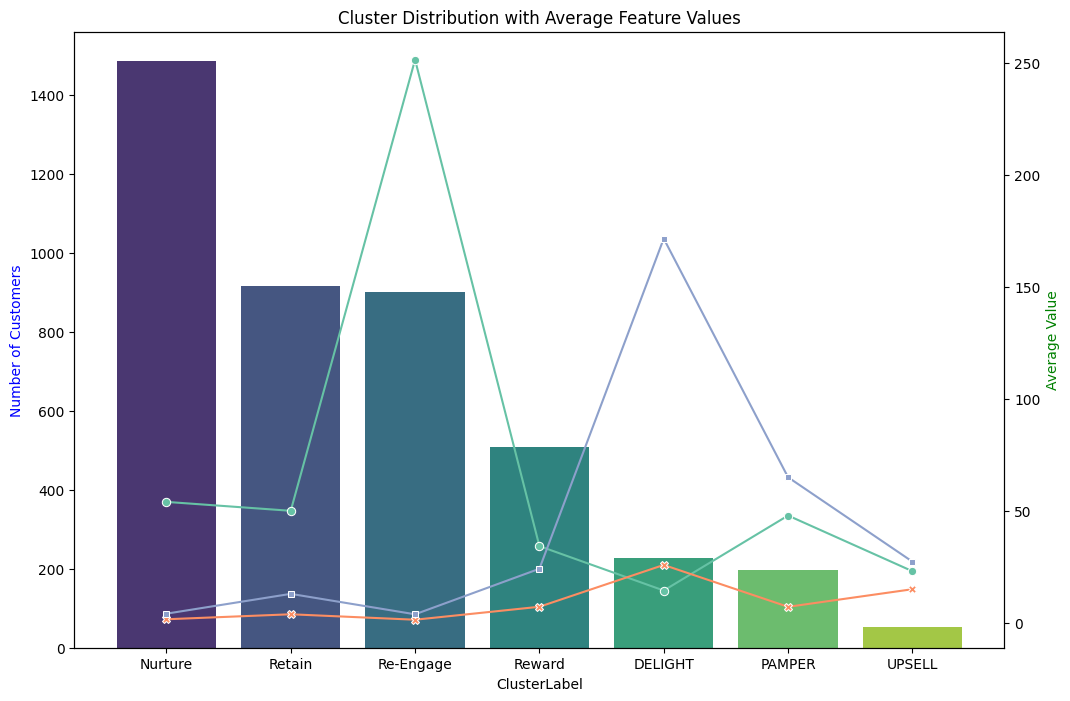

In [85]:
# Create a DataFrame from the counts and reset the index
cluster_counts = full_clusters_df['ClusterLabel'].value_counts()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['ClusterLabel', 'Counts']
full_clusters_df["MonetaryValue per 100 pounds"] = full_clusters_df["MonetaryValue"] / 100.00
feature_means = full_clusters_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Ensure ClusterLabel is of the correct type (e.g., int or str)
# If ClusterLabel is numeric, make sure it's treated as a categorical variable
cluster_counts_df['ClusterLabel'] = cluster_counts_df['ClusterLabel'].astype(str)

# Sort the DataFrame by Counts in descending order
cluster_counts_df.sort_values('Counts', ascending=False, inplace=True)

# Now, use this DataFrame in the barplot
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=cluster_counts_df,
    x='ClusterLabel',
    y='Counts',
    ax=ax1,
    palette='viridis'
)

ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Plot the feature means on the secondary y-axis
ax2 = ax1.twinx()

# Ensure the index of feature_means is in the same order as the sorted cluster_counts_df
feature_means = feature_means.reindex(cluster_counts_df['ClusterLabel'])

sns.lineplot(
    data=feature_means,
    ax=ax2,
    palette='Set2',
    markers=True,
    dashes=False,
    legend=False
)
ax2.set_ylabel('Average Value', color='g')

plt.show()